# 第二章 线性回归初识

## 2.1最小二乘法
    使用均方误差最小化目标函数的方法称为最小二乘法。
* 优点：简洁高效，适合小规模的数据。
* 缺点：当数据集过于庞大时，计算十分耗时，效率降低。

### 2.1.1最小二乘法（一元线性回归）
* 拟合方程:y=a+bx
* 误差：均方误差
* a=y的平均值-b*x的平均值

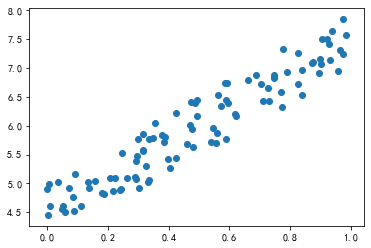

In [81]:
import matplotlib.pyplot as plt
import numpy as np
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
#一元线性回归拟合
#dataset	
x_points=np.random.rand(100,1)  #随机生成100行1列的浮点数,范围再（0~1）
y_points=4 + 3 *x_points + np.random.rand(100, 1)
plt.scatter(x_points,y_points)
plt.show()

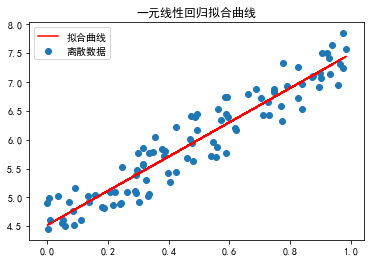

In [82]:
#拟合曲线的计算
def linear_fitting(x,y):
    i=0
    n=0
    p=0
    pin_y=sum(y)/len(y)  #y的平均值
    pin_x=sum(x)/len(x)  #x的平均值
    while(i<len(y)):
        n+=x[i]*y[i]  #分子
        m=len(x)*pin_y*pin_x  #分子
        p+=pow(x[i],2)   #分母 
        q=len(x)*pow(pin_x,2)  #分母
        i+=1
    b=(n-m)/(p-q)  #b参数
    a=pin_y-b*pin_x #a参数
    return a,b
#拟合方程的数值计算
def func(a,b,x_points):
    data=[]
    for x in x_points:
        data.append(a+b*x)
    return data
#可视化
def draw(x_points,y_points,data):
    plt.scatter(x_points,y_points,label="离散数据")
    plt.plot(x_points,data,"red",label="拟合曲线")
    plt.title("一元线性回归拟合曲线")
    plt.legend()

a,b=linear_fitting(x_points,y_points)
data=func(a,b,x_points)
draw(x_points,y_points,data)


### 2.1.2最小二乘法的一元多项式
* 拟合方程：numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*  (阶数2)

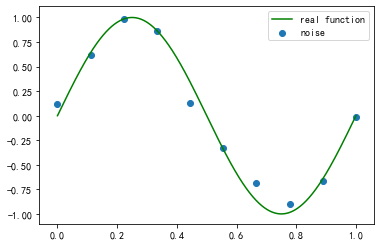

In [83]:
#目标函数
def real_function(x):
    return np.sin(2*np.pi*x)
#数据
x=np.linspace(0,1,1000)
x_points=np.linspace(0,1,10)  #添加十个噪音点
y=real_function(x_points)  #说是曲线函数，实际上是无限个点连接在一起
y_points=[np.random.normal(0,0.1)+yi for yi in y]  #噪音点对应的y值

#可视化
plt.plot(x,real_function(x),"g",label="real function")  #生成目标曲线
plt.scatter(x_points,y_points,label="noise")  #是个噪音点
plt.legend()

[[  0.07260281]
 [  9.03467741]
 [-27.72855221]
 [ 18.63704693]]


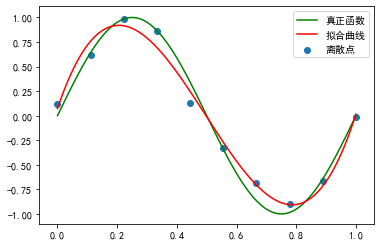

In [84]:
#多项式
def fit_function(p,x):
    f=np.poly1d(p)
    return f(x)

#矩阵计算
def calt(x_points,m):
    matrix_x=np.zeros((m+1,m+1))  #初始化x矩阵
    n=p=0
    for i in range(m+1):
        p=n
        for j in range(m+1):
            if(i+j==0):
                matrix_x[i][j]=len(x_points)
            else:
                for k in x_points:
                    matrix_x[i][j]+=pow(k,p)
            p+=1
        n+=1
    #print(f"matrix_x:\n{matrix_x}")
    #对y矩阵初始化
    matrix_y=np.zeros((m+1,1))
    for i in range(m+1):
        if(i==0):
            matrix_y[i][0]=sum(y_points)
        else:
            for k in range(len(x_points)):
                matrix_y[i][0]+=pow(x_points[k],i)*y_points[k]
    #print(f"matrix_y:\n{matrix_y}")

    return matrix_x,matrix_y
#计算最佳参数
def tran(matrix_x,matrix_y):
    tran_x=np.transpose(matrix_x)  #转置矩阵
    a=np.dot(np.dot(np.linalg.inv(np.dot(tran_x,matrix_x)),tran_x),matrix_y)  #a参数
    print(a)
    a_list=[]  #存储a参数至列表
    for i in a:
        a_list.append(i[0])
    a_list=a_list[::-1]   #列表反转   
    function=fit_function(a_list,x)
    return function
#可视化
def draw(x_points,function):
    plt.plot(x,real_function(x),"g",label="真正函数")  #生成目标曲线
    plt.scatter(x_points,y_points,label="离散点")  #是个噪音点
    plt.plot(x,function,"r",label="拟合曲线")
    plt.legend()

#主函数
matrix_x,matrix_y=calt(x_points,m=3)  #返回矩阵
function=tran(matrix_x,matrix_y)
draw(x_points,function)

### 最小二乘法的API
* from scipy.optimize import leastsq(残差方程，参数列表，拟合的数据点)

Fitting Parameters: [ 18.63704695 -27.72855224   9.03467743   0.07260281]


(array([ 18.63704695, -27.72855224,   9.03467743,   0.07260281]), 1)

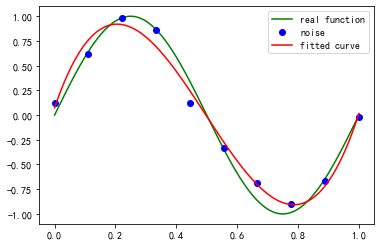

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
%matplotlib inline

  #目标函数
#def real_function(x):
    #return np.sin(2*np.pi*x)
#多项式
def fit_function(p,x):
    f=np.poly1d(p)
    return f(x)
#残差(误差函数)
def residual_function(p,x,y):
    ret=fit_function(p,x)-y  #因为输入的数据点有十个，所以输出的误差也有十个
    return ret
#数据
#x=np.linspace(0,1,1000)
#x_points=np.linspace(0,1,10)  #添加十个噪音点
#y=real_function(x_points)  #说是曲线函数，实际上是无限个点连接在一起
#y_points=[np.random.normal(0,0.1)+yi for yi in y]  #噪音点对应的y值
#nihe
def fitting(M=0):
    '''M 为多项式的次数'''
    #随机初始化多项式参数
    p_init=np.random.rand(M+1)  
    #最小二乘法,p_lsp：表示最优的参数
    p_lsq = leastsq(residual_function,  #误差函数
                     x0=p_init,   #表示函数的参数列表
                     args=(x_points,y_points)) #拟合的数据点
    print('Fitting Parameters:', p_lsq[0])

    #可视化
    plt.plot(x,real_function(x),"g",label="real function")  #生成目标曲线
    plt.plot(x_points,y_points,"bo",label="noise")  #是个噪音点
    plt.plot(x,fit_function(p_lsq[0],x),"r",label="fitted curve")  #拟合曲线
    plt.legend()
    return p_lsq

fitting(M=3)  